In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")
sys.path.append(str(Path(os.getcwd())))

In [2]:
base_path = Path(os.getcwd()).parent
sys.path.append(base_path)

In [4]:
water_lst = glob(f'{base_path}/raw_data/water_data/*.csv')
rain_lst = glob(f'{base_path}/raw_data/rf_data/*.csv')

In [8]:
water_df = pd.DataFrame()
rain_df = pd.DataFrame()
for w in water_lst:
    water_df = water_df.append(pd.read_csv(w))
for r in rain_lst:
    rain_df = rain_df.append(pd.read_csv(r))

In [14]:
water_df

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2021-05-01 00:00,24.930,0.0,208.88,35.12,138.0,311.0,361.7,905.32,346.2,NaN,340.0,983.18,301.3,895.58
1,2021-05-01 00:10,24.930,0.0,208.88,35.12,138.0,297.0,356.7,856.07,338.2,NaN,335.0,1285.80,308.3,1006.88
2,2021-05-01 00:20,24.920,0.0,208.52,35.48,138.0,283.0,347.7,770.98,331.2,NaN,331.0,1381.43,313.3,1090.45
3,2021-05-01 00:30,24.920,0.0,208.52,35.48,151.0,271.0,337.7,681.80,327.2,NaN,329.0,1359.95,315.3,1124.83
4,2021-05-01 00:40,24.920,0.0,208.52,35.48,151.0,259.0,328.7,606.35,323.2,NaN,327.0,1267.65,316.3,1142.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26491,2013-10-31 23:10,25.231,171.9,234.40,9.60,171.9,109.0,280.7,280.22,274.2,0.0,268.0,372.96,259.3,366.60
26492,2013-10-31 23:20,25.224,71.0,234.10,9.90,171.0,124.0,280.7,280.22,274.2,0.0,268.0,348.63,259.3,366.60
26493,2013-10-31 23:30,25.219,70.6,233.91,10.09,170.6,141.0,280.7,280.22,273.2,0.0,267.0,315.76,260.3,376.45
26494,2013-10-31 23:40,25.219,70.2,233.91,10.09,170.2,157.0,280.7,280.22,273.2,0.0,267.0,263.13,260.3,376.45


<AxesSubplot:xlabel='rf_10184140', ylabel='Density'>

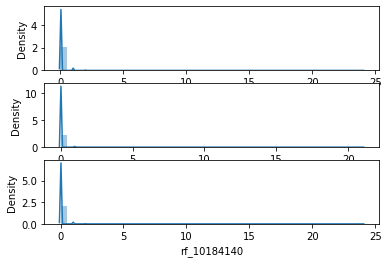

<Figure size 1080x576 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(3, 1)
plt.figure(figsize = (15,8))
sns.distplot(rain_df['rf_10184100'],ax = ax[0])
sns.distplot(rain_df['rf_10184110'],ax = ax[1])
sns.distplot(rain_df['rf_10184140'],ax = ax[2])

In [15]:
# water 데이터 컬럼 설명
"""
ymdhm : 년월일시분
swl : 팔당댐 현재수위 (단위 :El.m)
inf : 팔당댐 유입량 (단위 : m^3/s)
swf : 팔당댐 저수량 (단위 : 만m^3)
ecpc : 팔당댐 공용량 (단위 : 백만m^3)
tototf: 총 방류량 (eksdnl : m^3/s)
tide_level : 강화대교 조위 ( 단위 : cm)
wl_1018662 : 청담대교 수위 ( 단위 : cm)
fw_1018622 : 청담대교 유량 ( 단위 : m^3/s)
(유량은 단위시간 당 얼마만큼의 체적에 해당하는 액체가 이동했는지 나타낼 때 쓰는 개념)
wl_1018680 : 잠수교 수위 ( 단위 : cm)
fw_1018680 : 잠수교 유량 ( 단위 : m^3/s)
wl_1018683 : 한강대교 수위 ( 단위 : cm)
fw_1018683 : 한강대교 유량 ( 단위 : m^3/s)
wl_1019630 : 행주대교 수위 ( 단위 : cm)
fw_1019630 : 행주대교 유량 ( 단위 : m^3/s)
"""

# RainFall 데이터 컬럼 설명
"""
YMDHM : 년월일시분
rf_10184100 : 대곡교 강수량
rf_10184110 : 진관교 강수량
rf_10184140 : 송정동 강수량
"""

'\nYMDHM : 년월일시분\nrf_10184100 : 대곡교 강수량\nrf_10184110 : 진관교 강수량\nrf_10184140 : 송정동 강수량\n'